## Forecasting the production of electricity using LSTM.

#### The dataset has the electricity production records from 31-12-2004 to 02-01-2018. 
#### Total no. of rows 121273

## Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
np.random.seed(1234)
tf.random.set_seed(1234)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import logging
logging.disable(logging.CRITICAL)

## Importing the Dataset

In [28]:
df = pd.read_csv('AEP_hourly.csv',parse_dates=['Datetime'])
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [29]:
df.shape

(121273, 2)

In [30]:
#Sorting the dataset based on date and time
df = df.sort_values(by='Datetime')
df

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


In [31]:
data = df[120264:]

In [32]:
data

,Datetime,AEP_MW
117169,2018-06-22 00:00:00,14309.0
117122,2018-06-22 01:00:00,13576.0
117123,2018-06-22 02:00:00,12811.0
117124,2018-06-22 03:00:00,12420.0
117125,2018-06-22 04:00:00,12383.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


### Splitting the data into train and test dataset

In [33]:
train_size = int(len(data)*0.8)

In [34]:
data_train = data[:train_size]
data_train.to_csv('AEP_hourly_train1Y.csv',index=False)

In [35]:
data_test = data[train_size:]
data_test.to_csv('AEP_hourly_test1Y.csv',index=False)

In [36]:
df_train = pd.read_csv('AEP_hourly_train1Y.csv',parse_dates=['Datetime'])
df_train

,Datetime,AEP_MW
0,2018-06-22 00:00:00,14309.0
1,2018-06-22 01:00:00,13576.0
2,2018-06-22 02:00:00,12811.0
3,2018-06-22 03:00:00,12420.0
4,2018-06-22 04:00:00,12383.0
...,...,...
802,2018-07-25 10:00:00,16246.0
803,2018-07-25 11:00:00,17285.0
804,2018-07-25 12:00:00,18014.0
805,2018-07-25 13:00:00,18618.0


In [37]:
df_train.shape

(807, 2)

In [38]:
from datetime import datetime

In [39]:
train_dataset = df_train

In [40]:
#Setting datetime as index
train_dataset.index = df_train['Datetime']
train_dataset

,Datetime,AEP_MW
Datetime,,
2018-06-22 00:00:00,2018-06-22 00:00:00,14309.0
2018-06-22 01:00:00,2018-06-22 01:00:00,13576.0
2018-06-22 02:00:00,2018-06-22 02:00:00,12811.0
2018-06-22 03:00:00,2018-06-22 03:00:00,12420.0
2018-06-22 04:00:00,2018-06-22 04:00:00,12383.0
...,...,...
2018-07-25 10:00:00,2018-07-25 10:00:00,16246.0
2018-07-25 11:00:00,2018-07-25 11:00:00,17285.0
2018-07-25 12:00:00,2018-07-25 12:00:00,18014.0


In [41]:
train_dataset = train_dataset.drop('Datetime', axis=1)
train_dataset

,AEP_MW
Datetime,
2018-06-22 00:00:00,14309.0
2018-06-22 01:00:00,13576.0
2018-06-22 02:00:00,12811.0
2018-06-22 03:00:00,12420.0
2018-06-22 04:00:00,12383.0
...,...
2018-07-25 10:00:00,16246.0
2018-07-25 11:00:00,17285.0
2018-07-25 12:00:00,18014.0


In [42]:
train_dataset.head()

,AEP_MW
Datetime,
2018-06-22 00:00:00,14309.0
2018-06-22 01:00:00,13576.0
2018-06-22 02:00:00,12811.0
2018-06-22 03:00:00,12420.0
2018-06-22 04:00:00,12383.0


In [43]:
#train_dataset = train_dataset.drop(['date'],axis=1)

In [44]:
train_dataset.shape

(807, 1)

In [45]:
train_dataset.head()

,AEP_MW
Datetime,
2018-06-22 00:00:00,14309.0
2018-06-22 01:00:00,13576.0
2018-06-22 02:00:00,12811.0
2018-06-22 03:00:00,12420.0
2018-06-22 04:00:00,12383.0


(array([17703., 17707., 17711., 17713., 17717., 17721., 17725., 17729.,
        17733., 17737.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

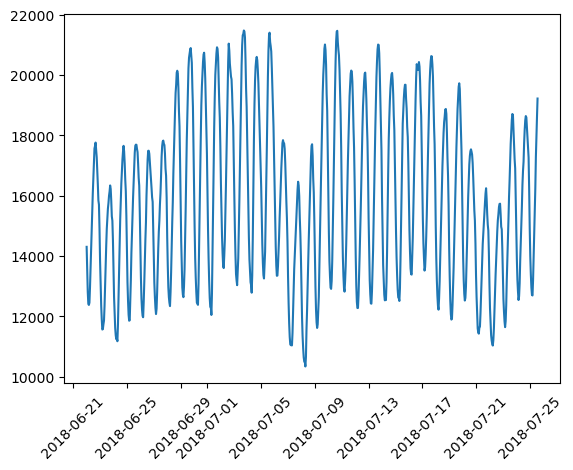

In [46]:
plt.plot(train_dataset)
plt.xticks(rotation=45)

In [47]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(np.array(train_dataset).reshape(-1,1))

In [48]:
train_scaled

array([[0.35607829],
       [0.29026755],
       [0.22158377],
       [0.18647872],
       [0.18315676],
       [0.18998025],
       [0.23541031],
       [0.2931406 ],
       [0.35536003],
       [0.41614293],
       [0.46812713],
       [0.51571198],
       [0.55674268],
       [0.60495601],
       [0.64885976],
       [0.65640151],
       [0.66636739],
       [0.64508888],
       [0.6226432 ],
       [0.5836775 ],
       [0.54219788],
       [0.49434369],
       [0.48168432],
       [0.40940923],
       [0.31405997],
       [0.24340097],
       [0.18207937],
       [0.14095888],
       [0.10998384],
       [0.1112408 ],
       [0.12533669],
       [0.13629018],
       [0.1803735 ],
       [0.24402945],
       [0.30436344],
       [0.35984917],
       [0.40985814],
       [0.43894775],
       [0.469833  ],
       [0.48599389],
       [0.50790088],
       [0.52073981],
       [0.53878614],
       [0.52837134],
       [0.49317651],
       [0.44684863],
       [0.43383013],
       [0.376

In [49]:
#training_size = int(len(data)*0.65)
#test_size = len(data) - training_size
#train_data, test_data = data[0:training_size,:], data[training_size:,:]

training_size = int(len(train_scaled))
train_data = train_scaled[0:training_size,:]

In [50]:
training_size

807

In [51]:
train_data.shape

(807, 1)

### Dividing the data based on window size

In [52]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        #a = dataset[i:(i+timestep), 0]

        dataX.append(dataset[i:(i+timestep), 0])
        dataY.append(dataset[i+timestep , 0])

    return np.array(dataX), np.array(dataY)

In [53]:
timestep = 100
X_train, y_train = create_dataset(train_data, timestep)
#X_test, y_test = create_dataset(test_data, timestep)

In [54]:
print(X_train.shape), print(y_train.shape)

(706, 100)
(706,)


(None, None)

In [55]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_train.shape

(706, 100, 1)

In [56]:
import keras


In [57]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
import keras

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

import keras_tuner

## Hyperparameter Tuning

In [59]:
def create_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
                   input_shape=(X_train.shape[1],X_train.shape[2]),
                   return_sequences=True))

    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'lstm_{i}_units', min_value=32, max_value=256, step=32),
                       return_sequences=True))

    model.add(LSTM(32))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss=hp.Choice('loss', values=['mean_squared_error', 'mean_absolute_error']),
                  optimizer=hp.Choice('optimizer', values=['SGD', 'RMSprop', 'Adam']),
                  metrics=['mse','mae'])
    return model

In [60]:
tuner = RandomSearch( # You can research and experiment with Hyperband and BayesianOptimization
    create_lstm_model,
    objective='mse',
    max_trials=2,  # Adjust this depending on the computational resources
    executions_per_trial=1,# Average the results of 2 runs to reduce variance
    directory='my_dir',
    project_name='tune_keras'
    )

Reloading Tuner from my_dir\tune_keras\tuner0.json


In [61]:
# EarlyStopping callback
early_stopper = EarlyStopping(min_delta=0.01, patience=5, restore_best_weights=True)

In [62]:
# Run the search
tuner.search(
      X_train,
      y_train,
      epochs=20,
      batch_size=32,
      callbacks = [early_stopper]
      )

In [63]:
# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]

In [64]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [65]:
print("Best hyperparameters: ", best_hyperparameters.values)
best_model.summary()

Best hyperparameters:  {'units': 96, 'activation': 'relu', 'n_layers': 2, 'lstm_0_units': 256, 'Dropout_rate': 0.0, 'loss': 'mean_squared_error', 'optimizer': 'RMSprop', 'lstm_1_units': 160}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 96)           37632     
                                                                 
 lstm_1 (LSTM)               (None, 100, 256)          361472    
                                                                 
 lstm_2 (LSTM)               (None, 100, 160)          266880    
                                                                 
 lstm_3 (LSTM)               (None, 32)                24704     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                               

In [66]:
model = Sequential()
model.add(LSTM(96, activation='relu', return_sequences=True,
                   input_shape=(timestep,1)))
model.add(LSTM(256, activation='relu', return_sequences=True))
model.add(LSTM(160, activation='relu', return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0))
model.add(Dense(1))
#optimizer = keras.optimizers.SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 96)           37632     
                                                                 
 lstm_5 (LSTM)               (None, 100, 256)          361472    
                                                                 
 lstm_6 (LSTM)               (None, 100, 160)          266880    
                                                                 
 lstm_7 (LSTM)               (None, 32)                24704     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 690,721
Trainable params: 690,721
Non-tr

In [68]:
# Fitting the model
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
23/23 [==============================] - 20s 417ms/step - loss: 0.1995
Epoch 2/10
23/23 [==============================] - 9s 386ms/step - loss: 0.0644
Epoch 3/10
23/23 [==============================] - 9s 394ms/step - loss: 0.0759
Epoch 4/10
23/23 [==============================] - 10s 428ms/step - loss: 0.0642
Epoch 5/10
23/23 [==============================] - 8s 366ms/step - loss: 0.0260
Epoch 6/10
23/23 [==============================] - 10s 433ms/step - loss: 0.0191
Epoch 7/10
23/23 [==============================] - 9s 373ms/step - loss: 0.0169
Epoch 8/10
23/23 [==============================] - 10s 415ms/step - loss: 0.0161
Epoch 9/10
23/23 [==============================] - 9s 400ms/step - loss: 0.0168
Epoch 10/10
23/23 [==============================] - 9s 379ms/step - loss: 0.0141


In [69]:
train_predict=model.predict(X_train)
#test_predict=model.predict(X_test)

23/23 [==============================] - 5s 134ms/step


In [70]:
train_predict.shape

(706, 1)

In [72]:
train_predict

array([[0.37781653],
       [0.32058188],
       [0.28636032],
       [0.27794018],
       [0.2947491 ],
       [0.33327848],
       [0.38803482],
       [0.45281103],
       [0.5208728 ],
       [0.5864024 ],
       [0.6449295 ],
       [0.69323856],
       [0.7292302 ],
       [0.75163364],
       [0.7598295 ],
       [0.75377303],
       [0.73392504],
       [0.70041835],
       [0.65370506],
       [0.5953419 ],
       [0.5282754 ],
       [0.45722696],
       [0.38829085],
       [0.3279826 ],
       [0.2836955 ],
       [0.25997168],
       [0.25905728],
       [0.28096142],
       [0.32298225],
       [0.3802462 ],
       [0.44690412],
       [0.5171259 ],
       [0.58526224],
       [0.64698243],
       [0.69899255],
       [0.739133  ],
       [0.7661933 ],
       [0.77947974],
       [0.7788928 ],
       [0.7646125 ],
       [0.7368614 ],
       [0.69496536],
       [0.63973546],
       [0.5730012 ],
       [0.49898535],
       [0.42349145],
       [0.3529748 ],
       [0.293

In [73]:
train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)

In [74]:
train_predict.shape

(706, 1)

In [76]:
train_predict

array([[14551.121 ],
       [13913.642 ],
       [13532.481 ],
       [13438.697 ],
       [13625.916 ],
       [14055.057 ],
       [14664.932 ],
       [15386.409 ],
       [16144.481 ],
       [16874.35  ],
       [17526.225 ],
       [18064.291 ],
       [18465.166 ],
       [18714.695 ],
       [18805.98  ],
       [18738.525 ],
       [18517.457 ],
       [18144.26  ],
       [17623.967 ],
       [16973.918 ],
       [16226.931 ],
       [15435.594 ],
       [14667.784 ],
       [13996.07  ],
       [13502.8   ],
       [13238.565 ],
       [13228.38  ],
       [13472.348 ],
       [13940.377 ],
       [14578.182 ],
       [15320.619 ],
       [16102.749 ],
       [16861.65  ],
       [17549.09  ],
       [18128.379 ],
       [18575.463 ],
       [18876.861 ],
       [19024.846 ],
       [19018.309 ],
       [18859.254 ],
       [18550.162 ],
       [18083.523 ],
       [17468.373 ],
       [16725.088 ],
       [15900.699 ],
       [15059.848 ],
       [14274.433 ],
       [13617

In [77]:
y_train

array([0.15056563, 0.14652541, 0.19213503, 0.24815945, 0.31666367,
       0.37708745, 0.4288023 , 0.50879871, 0.56518226, 0.61546059,
       0.64194649, 0.64203627, 0.63314778, 0.6086371 , 0.58466511,
       0.55683247, 0.53142395, 0.50350153, 0.48994433, 0.41569402,
       0.3295026 , 0.24914706, 0.2063207 , 0.17444784, 0.15604238,
       0.17175435, 0.22014724, 0.28685581, 0.35131981, 0.40105944,
       0.43338122, 0.48186389, 0.51643024, 0.56536182, 0.62434908,
       0.65595259, 0.66959957, 0.67229305, 0.66286586, 0.65891542,
       0.63323757, 0.58843598, 0.56769618, 0.50215479, 0.38561681,
       0.30158018, 0.23612857, 0.20614114, 0.18953133, 0.17974502,
       0.22149398, 0.27994254, 0.35993895, 0.42925121, 0.4895852 ,
       0.57451966, 0.63799605, 0.71305441, 0.75992099, 0.81370084,
       0.83803196, 0.87448375, 0.88022984, 0.87250853, 0.82914347,
       0.76072904, 0.71476028, 0.61177949, 0.48518585, 0.37457353,
       0.30328605, 0.23532052, 0.21341354, 0.2063207 , 0.23792

In [78]:
ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
ytrain

array([[12020.],
       [11975.],
       [12483.],
       [13107.],
       [13870.],
       [14543.],
       [15119.],
       [16010.],
       [16638.],
       [17198.],
       [17493.],
       [17494.],
       [17395.],
       [17122.],
       [16855.],
       [16545.],
       [16262.],
       [15951.],
       [15800.],
       [14973.],
       [14013.],
       [13118.],
       [12641.],
       [12286.],
       [12081.],
       [12256.],
       [12795.],
       [13538.],
       [14256.],
       [14810.],
       [15170.],
       [15710.],
       [16095.],
       [16640.],
       [17297.],
       [17649.],
       [17801.],
       [17831.],
       [17726.],
       [17682.],
       [17396.],
       [16897.],
       [16666.],
       [15936.],
       [14638.],
       [13702.],
       [12973.],
       [12639.],
       [12454.],
       [12345.],
       [12810.],
       [13461.],
       [14352.],
       [15124.],
       [15796.],
       [16742.],
       [17449.],
       [18285.],
       [18807.

In [79]:
ytrain = list(ytrain)
predicted = list(train_predict)

### Comparing the actual and predicted values

In [80]:
comp = pd.DataFrame()
comp['y_train'] = pd.DataFrame(ytrain)

In [81]:
comp['predicted'] = pd.DataFrame(predicted)
comp['difference'] = comp['y_train']-comp['predicted']
comp.head()

,y_train,predicted,difference
0,12020.0,14551.121094,-2531.121094
1,11975.0,13913.641602,-1938.641602
2,12483.0,13532.481445,-1049.481445
3,13107.0,13438.697266,-331.697266
4,13870.0,13625.916016,244.083984


In [82]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
math.sqrt(mean_absolute_error(ytrain,train_predict))

36.4207098612404

In [83]:
# Actual mean
df_train['AEP_MW'].mean()

15938.235439900867

As we can see the above 2 values the Actual mean and the RMSE. The RSME value is quit small then the actual mean. Hence, the model is trained well.

In [84]:
import numpy

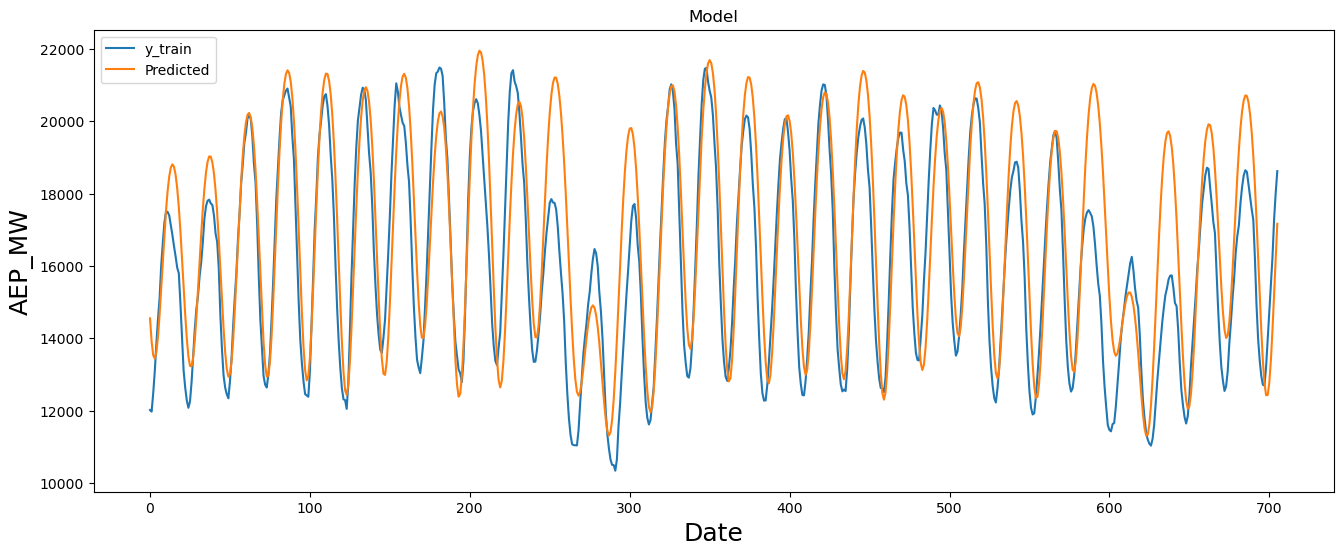

In [85]:
import matplotlib.pyplot as plt
# Plot the data
train = df_train[:training_size]
#valid = ytest
#valid['Predictions'] = test_predict
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('AEP_MW', fontsize=18)
#plt.plot(train['Close'])
plt.plot(comp[['y_train','predicted']])
#plt.plot(valid['test_predict'])
plt.legend(['y_train', 'Predicted'], loc='upper left')
plt.show()

### Forecasting the data

In [86]:
df_test = pd.read_csv('AEP_hourly_test1Y.csv',parse_dates=['Datetime'])
df_test.head()

,Datetime,AEP_MW
0,2018-07-25 15:00:00,19740.0
1,2018-07-25 16:00:00,19756.0
2,2018-07-25 17:00:00,19718.0
3,2018-07-25 18:00:00,19544.0
4,2018-07-25 19:00:00,19198.0


In [87]:
test_data = df_test

In [88]:
test_data.index = test_data['Datetime']
test_data.head()

,Datetime,AEP_MW
Datetime,,
2018-07-25 15:00:00,2018-07-25 15:00:00,19740.0
2018-07-25 16:00:00,2018-07-25 16:00:00,19756.0
2018-07-25 17:00:00,2018-07-25 17:00:00,19718.0
2018-07-25 18:00:00,2018-07-25 18:00:00,19544.0
2018-07-25 19:00:00,2018-07-25 19:00:00,19198.0


In [89]:
test_data = test_data.drop('Datetime', axis=1)

In [90]:
test_data.head()

,AEP_MW
Datetime,
2018-07-25 15:00:00,19740.0
2018-07-25 16:00:00,19756.0
2018-07-25 17:00:00,19718.0
2018-07-25 18:00:00,19544.0
2018-07-25 19:00:00,19198.0


In [91]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))
#test_scaled = scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [92]:
def future_values(dataset, n_step,k):

    test_predict = []

    first_batch = dataset[-n_step:]
    current_batch = first_batch.reshape(1, n_step, 1)

    for i in range(k):
    
        current_pred = model.predict(current_batch)[0]
    
        test_predict.append(current_pred)
    
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    
    test_predict = scaler.inverse_transform(test_predict)
    return np.array(test_predict)

In [93]:
future_predict = future_values(train_scaled,15,30)

1/1 [==============================] - 0s 42ms/step


In [94]:
def create_table(dataset,predicted,k):
    
    #comp = dataset.drop(['open','high','low','volume'], axis=1)
    comp = dataset[:k]
    comp['predicted'] = predicted
    
    comp['difference'] = comp['AEP_MW'] - comp['predicted']
    
    return comp

In [95]:
test_table = create_table(test_data,future_predict,30)

In [96]:
test_table

,AEP_MW,predicted,difference
Datetime,,,
2018-07-25 15:00:00,19740.0,14330.588008,5409.411992
2018-07-25 16:00:00,19756.0,13989.270826,5766.729174
2018-07-25 17:00:00,19718.0,13716.045467,6001.954533
2018-07-25 18:00:00,19544.0,13530.913870,6013.086130
2018-07-25 19:00:00,19198.0,13455.914078,5742.085922
2018-07-25 20:00:00,18728.0,13496.747464,5231.252536
2018-07-25 21:00:00,18033.0,13638.283285,4394.716715
2018-07-25 22:00:00,17561.0,13835.404493,3725.595507
2018-07-25 23:00:00,16349.0,14079.849144,2269.150856


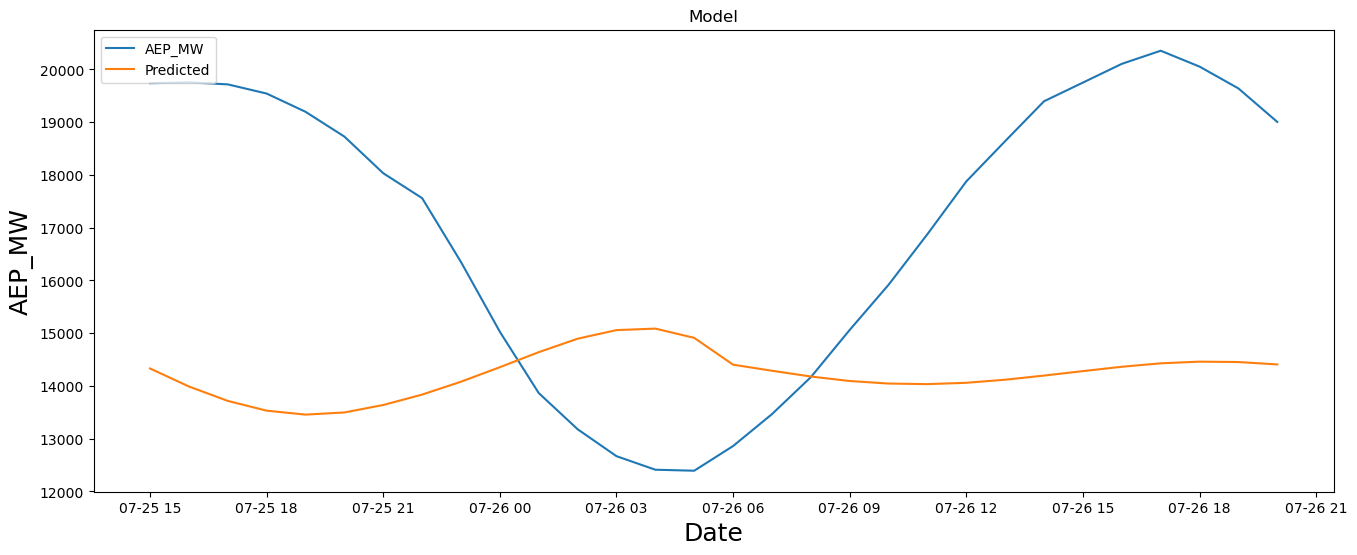

In [97]:
import matplotlib.pyplot as plt
# Plot the data
#valid = ytest
#valid['Predictions'] = test_predict
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('AEP_MW', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test_table[['AEP_MW','predicted']])
#plt.plot(valid['test_predict'])
plt.legend(['AEP_MW', 'Predicted'], loc='upper left')
plt.show()